# Deep learning with Keras: Application to the CIFAR-10 dataset
__Author: Dario Rocca__

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The 10 classes correspond to airplane, car, bird, cat, deer, dog, frog, horse,
ship, and truck. <br>
This script will use a not so deep neural network inspired by the VGG network. The accuracy reached for the testset (10000 test images) is above 80%. Not as good as the state of the art (>90%) but not so bad considering that the model can be easily trained on a laptop. 

## Loading Keras and other libraries 

In [1]:
# Keras libraries
from keras.datasets import cifar10  # The CIFAR-10 dataset, available within Keras
from keras.models import Sequential # We will be using the sequential model
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Flatten  # The layers
from keras.utils import np_utils # For one-hot encoding of categorical variables (10 image classes)
from keras.callbacks import EarlyStopping # To stop the optimization when convergence does not improve

# Other libraries for math and plots
import matplotlib.pyplot as plt
import numpy as np
import random

Using TensorFlow backend.


## Loading data

Very easy, as the dataset is available within Keras.

In [2]:
# Loading the training and test datasets 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Printing the size of the different arrays
print "size of X_train", X_train.shape
print "size of y_train", y_train.shape
print " "
print "size of X_test", X_test.shape
print "size of y_test", y_test.shape

# Number of classes of images (10)
num_classes = np.unique(y_train).shape[0]
print " "
print "Number of classes of images:", num_classes

# The 10 classes are described by a number from 0 to 9
# This dictionary associates these numbers to the "human-readable" classes
im_dict = {0:'airplane', 1: 'car', 2: 'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

size of X_train (50000, 32, 32, 3)
size of y_train (50000, 1)
 
size of X_test (10000, 32, 32, 3)
size of y_test (10000, 1)
 
Number of classes of images: 10


## Plotting some of the images

In the following I will select randomly from the training set 4 images for each different class and display them. The corresponding label will also be shown.

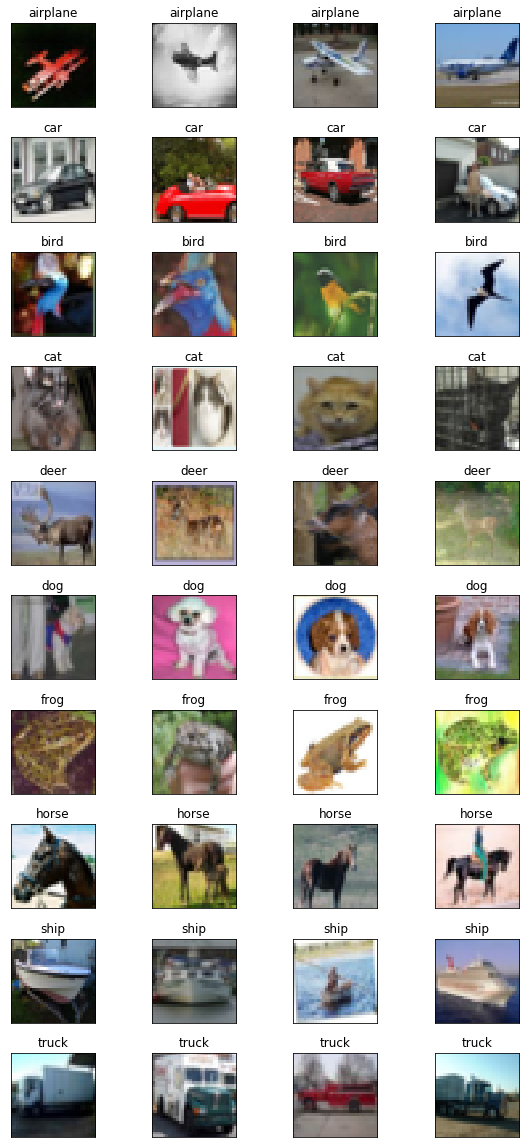

In [3]:
plt.figure(figsize=(8,16)) # The size of the plot

for i in range(num_classes):
    index_class = np.where(y_train[:]==i)[0]  # All the indexes in y_train corresponding to class i are found 
    len_class = len(index_class)              # Here I count the total number of images in class i (training set)
    rnd_class = random.sample(range(len_class), 4) # I select 4 different random numbers from 0 to len_class-1
    plt.tight_layout() # Adjusts automatically the spacing between subplots

    # 4 figures belonging to class i on the same line over 10 lines (because we have 10 classes)
    plt.subplot(num_classes, 4, i*4+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(im_dict[i])   # using the dictionary im_dict to connect a number to the class name
    index_train = index_class[rnd_class[0]] # The first random index corresponding to an image in class i
    plt.imshow(X_train[index_train,:,:,:])

    # Below we repeat other three times a similar piece of code to have a total of 4 images on a line
    # Of course it could also be done by a loop :)
    plt.subplot(num_classes, 4, i*4+2)
    plt.xticks([])
    plt.yticks([])
    plt.title(im_dict[i])
    index_train = index_class[rnd_class[1]]
    plt.imshow(X_train[index_train,:,:,:])


    plt.subplot(num_classes, 4, i*4+3)
    plt.xticks([])
    plt.yticks([])
    plt.title(im_dict[i])
    index_train = index_class[rnd_class[2]]
    plt.imshow(X_train[index_train,:,:,:])

    plt.subplot(num_classes, 4, i*4+4)
    plt.xticks([])
    plt.yticks([])
    plt.title(im_dict[i])
    index_train = index_class[rnd_class[3]]
    plt.imshow(X_train[index_train,:,:,:])

plt.show()

### Feature normalization and one-hot encoding of categorical variables

For the training of a neural network it is useful to normalize the features and to use one-hot encoding for the classes.

In [4]:
# Feature normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0 
X_test /= 255.0 

# One-hot encoding of y_train and y_test
Y_train = np_utils.to_categorical(y_train, num_classes) 
Y_test = np_utils.to_categorical(y_test, num_classes)

### The neural network model

Similarly to the VGGNet only 3x3 convolutions and 2x2 pooling are performed. I have done a few different experiments to get to this model. Of course regularization is crucial to obtain a good model.

In [5]:
# Keras model
model = Sequential()

# layer 1
model.add(Convolution2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Convolution2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))   # Dropout for regularization

# layer 2
model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(Convolution2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))   # Dropout for regularization

# layer 3
model.add(Convolution2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))   # Dropout for regularization

model.add(Flatten())

# dense layer
model.add(Dense(288, activation='relu'))  #, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))   # Dropout for regularization

# output layer with 
model.add(Dense(num_classes, activation='softmax'))

# displayng the structure of the network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### Compiling and optimizing the neural network model

In [6]:
# Using adam optimizer 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# If the loss of the validation set does not improve for 20 epochs optimization is stopped
ES = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=20, mode='auto')
callbacks_list = [ES]

# Holding out 10% of the data for validation
nn = model.fit(X_train, Y_train, batch_size=32, epochs=100, callbacks=callbacks_list, validation_split=0.1) 

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 155s 3ms/step - loss: 1.6378 - acc: 0.3883 - val_loss: 1.3270 - val_acc: 0.5086
Epoch 2/100
45000/45000 [==============================] - 151s 3ms/step - loss: 1.2310 - acc: 0.5569 - val_loss: 1.0149 - val_acc: 0.6346
Epoch 3/100
45000/45000 [==============================] - 151s 3ms/step - loss: 1.0823 - acc: 0.6158 - val_loss: 0.9303 - val_acc: 0.6690
Epoch 4/100
45000/45000 [==============================] - 150s 3ms/step - loss: 0.9967 - acc: 0.6454 - val_loss: 0.8437 - val_acc: 0.7116
Epoch 5/100
45000/45000 [==============================] - 150s 3ms/step - loss: 0.9330 - acc: 0.6695 - val_loss: 0.7770 - val_acc: 0.7334
Epoch 6/100
45000/45000 [==============================] - 151s 3ms/step - loss: 0.8904 - acc: 0.6864 - val_loss: 0.7475 - val_acc: 0.7410
Epoch 7/100
45000/45000 [==============================] - 151s 3ms/step - loss: 0.8522 - acc: 0.7015 - val_loss: 0.7

45000/45000 [==============================] - 151s 3ms/step - loss: 0.6033 - acc: 0.7923 - val_loss: 0.5478 - val_acc: 0.8168
Epoch 60/100
45000/45000 [==============================] - 151s 3ms/step - loss: 0.5995 - acc: 0.7922 - val_loss: 0.5645 - val_acc: 0.8100
Epoch 61/100
45000/45000 [==============================] - 152s 3ms/step - loss: 0.6098 - acc: 0.7898 - val_loss: 0.5820 - val_acc: 0.8110
Epoch 62/100
45000/45000 [==============================] - 151s 3ms/step - loss: 0.5948 - acc: 0.7954 - val_loss: 0.5828 - val_acc: 0.8042
Epoch 63/100
45000/45000 [==============================] - 151s 3ms/step - loss: 0.6004 - acc: 0.7944 - val_loss: 0.5936 - val_acc: 0.8010
Epoch 64/100
45000/45000 [==============================] - 151s 3ms/step - loss: 0.5992 - acc: 0.7941 - val_loss: 0.5714 - val_acc: 0.8166
Epoch 65/100
45000/45000 [==============================] - 152s 3ms/step - loss: 0.6001 - acc: 0.7944 - val_loss: 0.5692 - val_acc: 0.8084
Epoch 66/100
45000/45000 [=======

Let's plot now the loss function and accuracy on the training and validation sets as a function of the epochs.

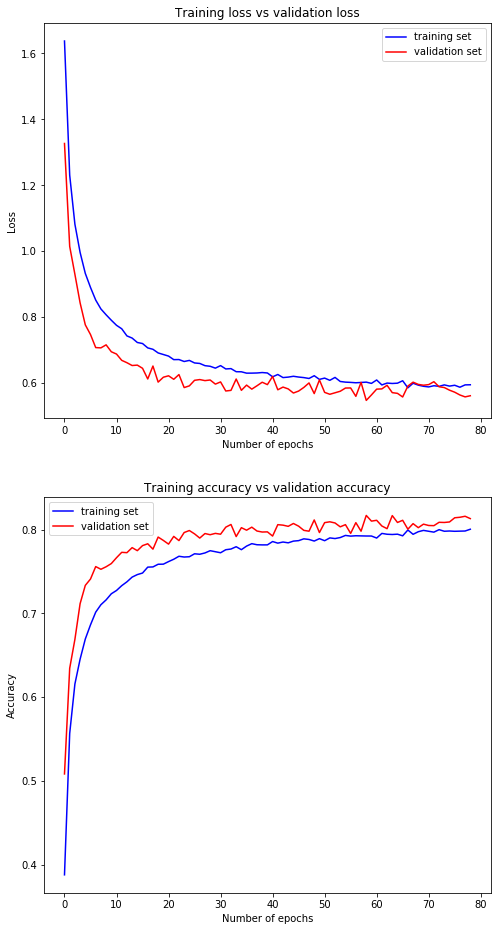

In [10]:
plt.figure(figsize=(8,16)) # The size of the plot

plt.subplot(211)
plt.plot(nn.history['loss'],'b')
plt.plot(nn.history['val_loss'],'r')
plt.xticks(np.arange(0, 82, 10))
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.title("Training loss vs validation loss")
plt.legend(['training set','validation set'])

plt.subplot(212)
plt.plot(nn.history['acc'],'b')
plt.plot(nn.history['val_acc'],'r')
plt.xticks(np.arange(0, 81, 10))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title("Training accuracy vs validation accuracy")
plt.legend(['training set','validation set'])
 
plt.show()

__Very interesting:__ The validation set has systematically lower loss and higher accuracy than the training set. Of course the difference tends to become smaller and smaller as the epochs increase. This means that the model is well balanced and does not overfit. In several other models I trained, the accuracy of the training set was sizeably larger than the accuracy of the validation set after just few epochs; in this case there was a clear overfit. 

### Performance on the test set

Now we look at the loss and accuracy of the trained model on the test set. 

In [17]:
mde = model.evaluate(X_test, Y_test, verbose=1)
print ""
print "Loss on test set: ", mde[0]
print ""
print "Accuracy on test set: ", mde[1]

10000/10000 [==============================] - 9s 893us/step

Loss on test set:  0.588925041103

Accuracy on test set:  0.804


__An accuracy of about 80% is found on the test set.__ This is somehow expected by considering the behavior of the network during optimization. 

### Analysis of the mislabeled images

The network considered in this notebook provided a reasonably good accuracy of 80%. Let's look at some mistakes in the classification of the test set. To this purpose I will consider a multiindex bar chart. In this plot each bar corresponds to a different class of image; the total height of the bar is proportional to the total number of mislabeled images for that class. Each bar is then divided in intervals to visualize how that class has actually been mislabeled; for example, as shown in the plot below an airplane is most often mislabeled as a ship, a cat, and a bird as the corresponding light green, red, and orange (sub-)bars give a significant contribution to the full airplane bar. This analysis of the mislabeled images is interesting per se and could give some hints on how to improve the model.

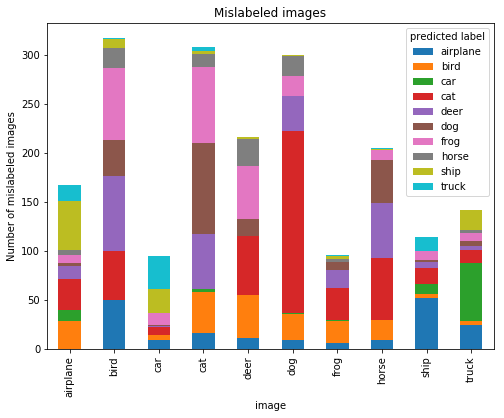

In [115]:
# Importing Pandas libraries that will be useful in this cell
import pandas as pd 

# Previously I evaluated the accuracy of the model on the test set
# Here I compute explicitly the predictions and put them in 'predictions'
predictions = model.predict_classes(X_test)

# In the few commented lines below a not very elegant piece of code used for debugging

#cnt = 0
#for i in range(len(predictions)):
#    if (y_test[i][0]==1) and (predictions[i]==5):
#        cnt += 1
#print 'beginning'
#print cnt
#print 'end'

# As y_test is a list of 1 dimensional lists I convert it into a list 

y_test_tmp = [y_test[i][0] for i in range(len(y_test))]

# Finding all the indexes corresponding to mislabeled images

index_mislabel = np.where((y_test_tmp[:]!=predictions[:]))[0]

# mis_y_test: List of exact labels for mislabeled images
# mis_predictions: List of the corresponding wrong labels

mis_y_test = [im_dict[y_test_tmp[i]] for i in list(index_mislabel)]
mis_predictions = [im_dict[predictions[i]] for i in list(index_mislabel)]

# For convenience creating a dataframe containing mis_y_test ('image' column) and mis_predictions ('predicted label')

mis_dic = {'image': mis_y_test, 'predicted label': mis_predictions}
mis_df = pd.DataFrame(mis_dic)

# Pandas series containing for each class the number of mislabeled images subdivided in the corresponding
# classes

mis_df_gb = mis_df.groupby(['image','predicted label'])['predicted label'].count()

#print mis_df_gb

# Plotting the information in the previous series
mis_df_gb.unstack().plot(kind='bar', stacked=True)
plt.title('Mislabeled images')
plt.ylabel('Number of mislabeled images')
plt.show()


Below some remarks, mostly about the mistakes of the neural network that I found surprising from a human perspective: <br>
-The frog and car classes have the lowest number of mislabeled images. <br>
-The bird, cat, and dog classes have the largest number of mislabeled images. I would have exected it for cats and dogs but I'm surprised about birds, as they have more distinctive features. <br>
-There is often a lack of symmetry: For example, dogs are often mislabelled as cats but the opposite is much less frequent. <br>
-Why are airplanes so often labeled as cats? It is not surprising that airplanes are confused with birds or ships (sails or oars can be mistaken for wings). However, it is not clear why cat is such a frequent mislabel. <br>
-It is a bit surpising that a deer is most often mislabeled as a bird, a cat, and a frog rather than a horse. <br> 

## Final remarks

This is my first experiment with deep neural networks. Using the Keras libraries and building a VGG type network I obtained a simple model that correctly labels 80% of the images in the CIFAR-10 dataset. I think that adding some additional layers by paying attention to the regularization could improve significantly the model.  